In [ ]:
import numpy as np
import time
from IPython.display import clear_output

class TicTacToe:
    def __init__(self):
        # Initialize an empty 3x3 board
        self.board = np.full((3, 3), ' ')
        self.current_player = 'X'  # X always starts
        self.game_over = False
        self.winner = None

        # Performance metrics
        self.minimax_calls = 0
        self.alphabeta_calls = 0

    def reset_game(self):
        """Reset the game to initial state"""
        self.board = np.full((3, 3), ' ')
        self.current_player = 'X'
        self.game_over = False
        self.winner = None
        self.minimax_calls = 0
        self.alphabeta_calls = 0

    def make_move(self, row, col):
        """Make a move at the specified position"""
        if self.game_over or self.board[row, col] != ' ':
            return False  # Invalid move

        self.board[row, col] = self.current_player

        # Check for win or draw
        if self.check_win(self.current_player):
            self.game_over = True
            self.winner = self.current_player
        elif self.is_board_full():
            self.game_over = True
            self.winner = 'draw'
        else:
            # Switch player
            self.current_player = 'O' if self.current_player == 'X' else 'X'

        return True

    def check_win(self, player):
        """Check if the specified player has won"""
        # Check rows
        for i in range(3):
            if np.all(self.board[i, :] == player):
                return True

        # Check columns
        for i in range(3):
            if np.all(self.board[:, i] == player):
                return True

        # Check diagonals
        if self.board[0, 0] == player and self.board[1, 1] == player and self.board[2, 2] == player:
            return True

        if self.board[0, 2] == player and self.board[1, 1] == player and self.board[2, 0] == player:
            return True

        return False

    def is_board_full(self):
        """Check if the board is full (draw)"""
        return ' ' not in self.board

    def get_available_moves(self):
        """Get available moves on the board"""
        moves = []
        for i in range(3):
            for j in range(3):
                if self.board[i, j] == ' ':
                    moves.append((i, j))
        return moves

    def print_board(self):
        """Print the current state of the board"""
        print("  0 1 2")
        for i in range(3):
            print(f"{i} {self.board[i, 0]}|{self.board[i, 1]}|{self.board[i, 2]}")
            if i < 2:
                print("  -+-+-")

    def minimax(self, board, depth, is_maximizing, player, opponent):
        """Standard Minimax algorithm implementation"""
        self.minimax_calls += 1

        # Check terminal states
        if self._check_win_for_board(board, player):
            return 10 - depth  # Win (the quicker the win, the better)
        if self._check_win_for_board(board, opponent):
            return depth - 10  # Loss (the later the loss, the better)
        if self._is_board_full_for_board(board):
            return 0  # Draw

        if is_maximizing:
            best_score = float('-inf')
            for i in range(3):
                for j in range(3):
                    if board[i, j] == ' ':
                        board[i, j] = player
                        score = self.minimax(board, depth + 1, False, player, opponent)
                        board[i, j] = ' '  # Undo move
                        best_score = max(score, best_score)
            return best_score
        else:
            best_score = float('inf')
            for i in range(3):
                for j in range(3):
                    if board[i, j] == ' ':
                        board[i, j] = opponent
                        score = self.minimax(board, depth + 1, True, player, opponent)
                        board[i, j] = ' '  # Undo move
                        best_score = min(score, best_score)
            return best_score

    def alpha_beta_minimax(self, board, depth, alpha, beta, is_maximizing, player, opponent):
        """Minimax with Alpha-Beta pruning optimization"""
        self.alphabeta_calls += 1

        # Check terminal states
        if self._check_win_for_board(board, player):
            return 10 - depth  # Win
        if self._check_win_for_board(board, opponent):
            return depth - 10  # Loss
        if self._is_board_full_for_board(board):
            return 0  # Draw

        if is_maximizing:
            best_score = float('-inf')
            for i in range(3):
                for j in range(3):
                    if board[i, j] == ' ':
                        board[i, j] = player
                        score = self.alpha_beta_minimax(board, depth + 1, alpha, beta, False, player, opponent)
                        board[i, j] = ' '  # Undo move
                        best_score = max(score, best_score)
                        alpha = max(alpha, best_score)
                        if beta <= alpha:
                            return best_score  # Beta cutoff
            return best_score
        else:
            best_score = float('inf')
            for i in range(3):
                for j in range(3):
                    if board[i, j] == ' ':
                        board[i, j] = opponent
                        score = self.alpha_beta_minimax(board, depth + 1, alpha, beta, True, player, opponent)
                        board[i, j] = ' '  # Undo move
                        best_score = min(score, best_score)
                        beta = min(beta, best_score)
                        if beta <= alpha:
                            return best_score  # Alpha cutoff
            return best_score

    def find_best_move_with_minimax(self):
        """Find the best move using standard Minimax"""
        self.minimax_calls = 0  # Reset counter
        player = self.current_player
        opponent = 'O' if player == 'X' else 'X'

        best_score = float('-inf')
        best_move = None

        start_time = time.time()

        for i in range(3):
            for j in range(3):
                if self.board[i, j] == ' ':
                    self.board[i, j] = player
                    score = self.minimax(self.board, 0, False, player, opponent)
                    self.board[i, j] = ' '  # Undo move
                    if score > best_score:
                        best_score = score
                        best_move = (i, j)

        end_time = time.time()

        return {
            'move': best_move,
            'score': best_score,
            'calls': self.minimax_calls,
            'time': (end_time - start_time) * 1000  # Convert to milliseconds
        }

    def find_best_move_with_alpha_beta(self):
        """Find the best move using Minimax with Alpha-Beta pruning"""
        self.alphabeta_calls = 0  # Reset counter
        player = self.current_player
        opponent = 'O' if player == 'X' else 'X'

        best_score = float('-inf')
        best_move = None

        start_time = time.time()

        for i in range(3):
            for j in range(3):
                if self.board[i, j] == ' ':
                    self.board[i, j] = player
                    score = self.alpha_beta_minimax(self.board, 0, float('-inf'), float('inf'), False, player, opponent)
                    self.board[i, j] = ' '  # Undo move
                    if score > best_score:
                        best_score = score
                        best_move = (i, j)

        end_time = time.time()

        return {
            'move': best_move,
            'score': best_score,
            'calls': self.alphabeta_calls,
            'time': (end_time - start_time) * 1000  # Convert to milliseconds
        }

    def _check_win_for_board(self, board, player):
        """Helper function to check win on any board state"""
        # Check rows
        for i in range(3):
            if np.all(board[i, :] == player):
                return True

        # Check columns
        for i in range(3):
            if np.all(board[:, i] == player):
                return True

        # Check diagonals
        if board[0, 0] == player and board[1, 1] == player and board[2, 2] == player:
            return True

        if board[0, 2] == player and board[1, 1] == player and board[2, 0] == player:
            return True

        return False

    def _is_board_full_for_board(self, board):
        """Helper function to check if a board is full"""
        return ' ' not in board

    def compare_algorithms(self):
        """Compare performance of both algorithms on various board states"""
        results = []

        # Test cases with different board states
        test_boards = [
            # Empty board
            np.full((3, 3), ' '),

            # Board with 1 move
            np.array([
                ['X', ' ', ' '],
                [' ', ' ', ' '],
                [' ', ' ', ' ']
            ]),

            # Board with 2 moves
            np.array([
                ['X', ' ', ' '],
                [' ', 'O', ' '],
                [' ', ' ', ' ']
            ]),

            # Board with 3 moves
            np.array([
                ['X', ' ', ' '],
                [' ', 'O', ' '],
                [' ', ' ', 'X']
            ]),

            # Board with 4 moves
            np.array([
                ['X', 'O', ' '],
                [' ', 'O', ' '],
                [' ', ' ', 'X']
            ])
        ]

        for idx, test_board in enumerate(test_boards):
            self.reset_game()
            self.board = test_board.copy()
            self.current_player = 'X'  # Ensure X is always the current player for consistency

            print(f"Test Case {idx + 1}:")
            self.print_board()

            # Calculate using standard Minimax
            minimax_result = self.find_best_move_with_minimax()

            # Calculate using Alpha-Beta pruning
            alpha_beta_result = self.find_best_move_with_alpha_beta()

            print("Minimax Performance:")
            print(f"- Best move: {minimax_result['move']}")
            print(f"- Score: {minimax_result['score']}")
            print(f"- Function calls: {minimax_result['calls']}")
            print(f"- Time taken: {minimax_result['time']:.2f} ms")

            print("\nAlpha-Beta Pruning Performance:")
            print(f"- Best move: {alpha_beta_result['move']}")
            print(f"- Score: {alpha_beta_result['score']}")
            print(f"- Function calls: {alpha_beta_result['calls']}")
            print(f"- Time taken: {alpha_beta_result['time']:.2f} ms")

            call_reduction = ((minimax_result['calls'] - alpha_beta_result['calls']) / minimax_result['calls']) * 100
            time_reduction = ((minimax_result['time'] - alpha_beta_result['time']) / minimax_result['time']) * 100

            print("\nPerformance Improvement:")
            print(f"- Function call reduction: {call_reduction:.2f}%")
            print(f"- Time reduction: {time_reduction:.2f}%")
            print("-" * 50)

            results.append({
                'test_case': idx + 1,
                'minimax': minimax_result,
                'alpha_beta': alpha_beta_result,
                'call_reduction': call_reduction,
                'time_reduction': time_reduction
            })

        return results

    def play_game_with_ai(self, algorithm='alpha_beta'):
        """Play a game against the AI"""
        self.reset_game()
        print("Welcome to Tic-Tac-Toe!")
        print("You are X and the AI is O")

        while not self.game_over:
            clear_output(wait=True)
            self.print_board()

            if self.current_player == 'X':  # Human's turn
                try:
                    row = int(input("Enter row (0-2): "))
                    col = int(input("Enter col (0-2): "))
                    if row < 0 or row > 2 or col < 0 or col > 2:
                        print("Invalid input! Row and column must be between 0 and 2.")
                        time.sleep(1)
                        continue

                    valid_move = self.make_move(row, col)
                    if not valid_move:
                        print("Invalid move! Cell already taken.")
                        time.sleep(1)
                except ValueError:
                    print("Invalid input! Please enter numbers.")
                    time.sleep(1)
            else:  # AI's turn
                print("AI is thinking...")

                if algorithm == 'minimax':
                    result = self.find_best_move_with_minimax()
                    print(f"AI used Minimax with {result['calls']} function calls, taking {result['time']:.2f} ms")
                else:
                    result = self.find_best_move_with_alpha_beta()
                    print(f"AI used Alpha-Beta pruning with {result['calls']} function calls, taking {result['time']:.2f} ms")

                row, col = result['move']
                time.sleep(0.5)  # Add a small delay to show AI "thinking"
                self.make_move(row, col)

        # Game over
        clear_output(wait=True)
        self.print_board()

        if self.winner == 'draw':
            print("It's a draw!")
        else:
            print(f"Player {self.winner} wins!")

# Example usage
if __name__ == "__main__":
    game = TicTacToe()

    # Option 1: Compare the algorithms on different board states
    results = game.compare_algorithms()

    # Option 2: Play a game against the AI
    # game.play_game_with_ai(algorithm='alpha_beta')  # Or 'minimax'

1. ALGORITHM COMPARISON ON DIFFERENT BOARD STATES
Test Case 1:
  0 1 2
0  | | 
  -+-+-
1  | | 
  -+-+-
2  | | 
Minimax Performance:
- Best move: (0, 0)
- Score: 0
- Function calls: 549945
- Time taken: 34219.94 ms

Alpha-Beta Pruning Performance:
- Best move: (0, 0)
- Score: 0
- Function calls: 34202
- Time taken: 2456.87 ms

Performance Improvement:
- Function call reduction: 93.78%
- Time reduction: 92.82%
--------------------------------------------------
Test Case 2:
  0 1 2
0 X| | 
  -+-+-
1  | | 
  -+-+-
2  | | 
Minimax Performance:
- Best move: (0, 1)
- Score: 6
- Function calls: 48436
- Time taken: 3250.29 ms

Alpha-Beta Pruning Performance:
- Best move: (0, 1)
- Score: 6
- Function calls: 4071
- Time taken: 227.21 ms

Performance Improvement:
- Function call reduction: 91.60%
- Time reduction: 93.01%
--------------------------------------------------
Test Case 3:
  0 1 2
0 X| | 
  -+-+-
1  |O| 
  -+-+-
2  | | 
Minimax Performance:
- Best move: (0, 1)
- Score: 0
- Function call

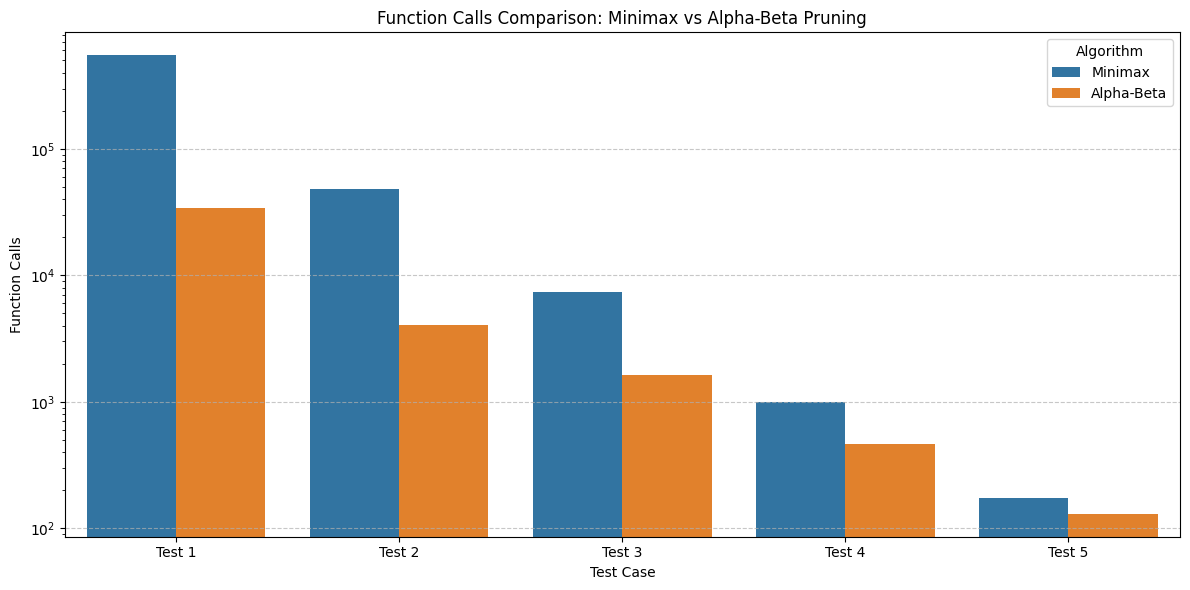

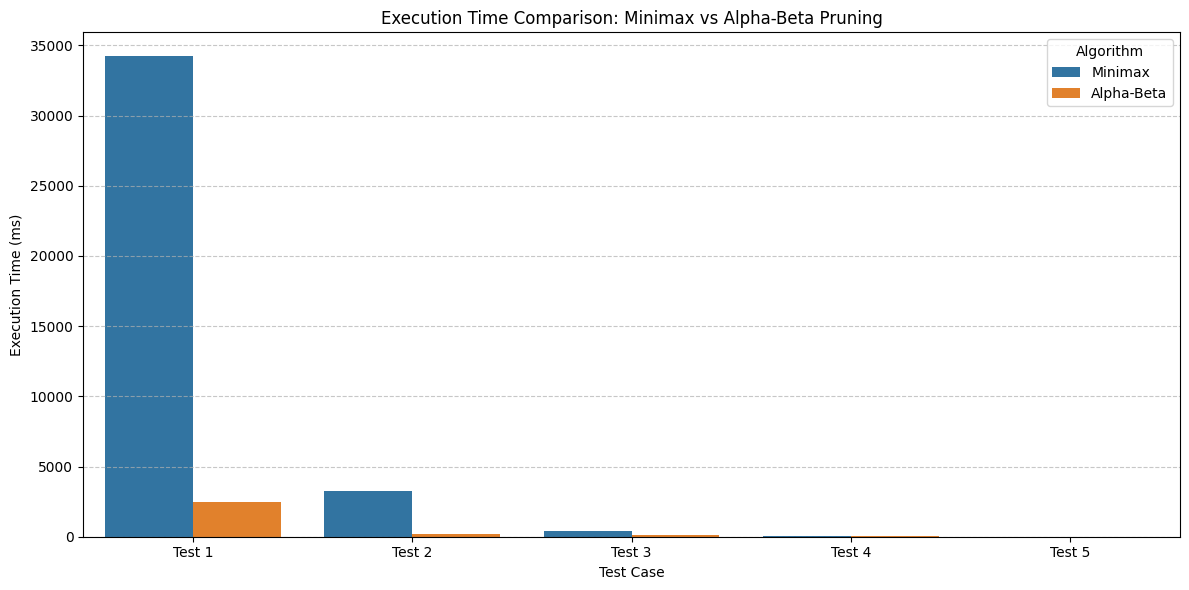

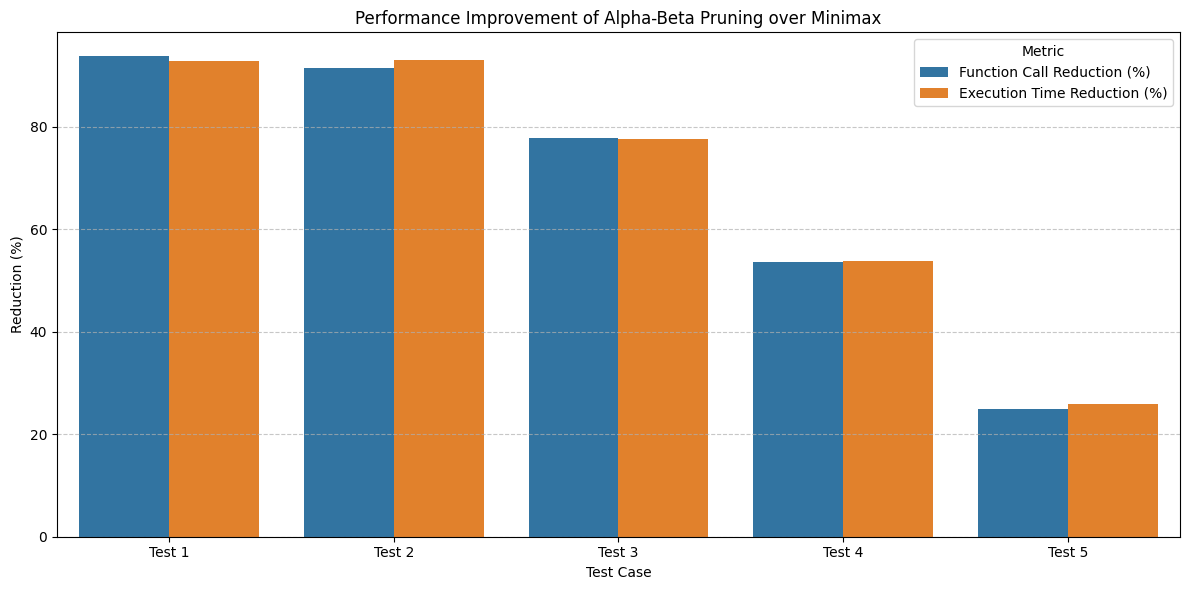


3. ANALYSIS AND SUMMARY
Average Function Call Reduction: 68.34%
Average Execution Time Reduction: 68.63%

Highest Function Call Reduction: 93.78% in Test Case 1
  - Minimax Calls: 549945
  - Alpha-Beta Calls: 34202

4. THEORETICAL ANALYSIS
Minimax Time Complexity: O(b^d)
Alpha-Beta Pruning Best Case Time Complexity: O(b^(d/2))
Where b is the branching factor (available moves) and d is the depth of the game tree

In Tic-Tac-Toe:
- Initial branching factor is 9 (empty board)
- Maximum game depth is 9 (all cells filled)
- For a complete game, Minimax would evaluate up to 9! = 362,880 nodes
- With perfect Alpha-Beta pruning, this can be reduced to approximately sqrt(9!) ≈ 602 nodes

5. PLAY AGAINST THE AI
1. Play against Minimax AI
2. Play against Alpha-Beta AI
3. Skip


In [ ]:
# Tic-Tac-Toe with Minimax and Alpha-Beta Pruning

# Import necessary libraries
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
from IPython.display import HTML
import pandas as pd
import seaborn as sns

# Paste the TicTacToe class implementation here
# [From the above code artifact]

# Create a new game instance
game = TicTacToe()

# 1. Run Algorithm Comparison
print("1. ALGORITHM COMPARISON ON DIFFERENT BOARD STATES")
print("=" * 50)
results = game.compare_algorithms()

# 2. Visualize the results
print("\n2. PERFORMANCE VISUALIZATION")
print("=" * 50)

# Create performance comparison dataframes
test_cases = [f"Test {r['test_case']}" for r in results]
minimax_calls = [r['minimax']['calls'] for r in results]
alphabeta_calls = [r['alpha_beta']['calls'] for r in results]
minimax_times = [r['minimax']['time'] for r in results]
alphabeta_times = [r['alpha_beta']['time'] for r in results]
call_reductions = [r['call_reduction'] for r in results]
time_reductions = [r['time_reduction'] for r in results]

# Create dataframe for plotting
df_calls = pd.DataFrame({
    'Test Case': test_cases,
    'Minimax': minimax_calls,
    'Alpha-Beta': alphabeta_calls
})

df_times = pd.DataFrame({
    'Test Case': test_cases,
    'Minimax': minimax_times,
    'Alpha-Beta': alphabeta_times
})

# Plot function calls comparison
plt.figure(figsize=(12, 6))
df_calls_melted = pd.melt(df_calls, id_vars=['Test Case'], var_name='Algorithm', value_name='Function Calls')
sns.barplot(x='Test Case', y='Function Calls', hue='Algorithm', data=df_calls_melted)
plt.title('Function Calls Comparison: Minimax vs Alpha-Beta Pruning')
plt.yscale('log')  # Use log scale as the difference can be very large
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot execution time comparison
plt.figure(figsize=(12, 6))
df_times_melted = pd.melt(df_times, id_vars=['Test Case'], var_name='Algorithm', value_name='Execution Time (ms)')
sns.barplot(x='Test Case', y='Execution Time (ms)', hue='Algorithm', data=df_times_melted)
plt.title('Execution Time Comparison: Minimax vs Alpha-Beta Pruning')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot improvement percentages
plt.figure(figsize=(12, 6))
df_improvements = pd.DataFrame({
    'Test Case': test_cases,
    'Function Call Reduction (%)': call_reductions,
    'Execution Time Reduction (%)': time_reductions
})
df_improvements_melted = pd.melt(df_improvements, id_vars=['Test Case'], var_name='Metric', value_name='Reduction (%)')
sns.barplot(x='Test Case', y='Reduction (%)', hue='Metric', data=df_improvements_melted)
plt.title('Performance Improvement of Alpha-Beta Pruning over Minimax')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Analysis and Summary
print("\n3. ANALYSIS AND SUMMARY")
print("=" * 50)

avg_call_reduction = sum(call_reductions) / len(call_reductions)
avg_time_reduction = sum(time_reductions) / len(time_reductions)

print(f"Average Function Call Reduction: {avg_call_reduction:.2f}%")
print(f"Average Execution Time Reduction: {avg_time_reduction:.2f}%")

max_call_idx = call_reductions.index(max(call_reductions))
print(f"\nHighest Function Call Reduction: {max(call_reductions):.2f}% in Test Case {max_call_idx + 1}")
print(f"  - Minimax Calls: {minimax_calls[max_call_idx]}")
print(f"  - Alpha-Beta Calls: {alphabeta_calls[max_call_idx]}")

# Theoretical Analysis
print("\n4. THEORETICAL ANALYSIS")
print("=" * 50)
print("Minimax Time Complexity: O(b^d)")
print("Alpha-Beta Pruning Best Case Time Complexity: O(b^(d/2))")
print("Where b is the branching factor (available moves) and d is the depth of the game tree")
print("\nIn Tic-Tac-Toe:")
print("- Initial branching factor is 9 (empty board)")
print("- Maximum game depth is 9 (all cells filled)")
print("- For a complete game, Minimax would evaluate up to 9! = 362,880 nodes")
print("- With perfect Alpha-Beta pruning, this can be reduced to approximately sqrt(9!) ≈ 602 nodes")

# 5. Interactive Play
print("\n5. PLAY AGAINST THE AI")
print("=" * 50)
print("1. Play against Minimax AI")
print("2. Play against Alpha-Beta AI")
print("3. Skip")

choice = input("Enter your choice (1-3): ")

if choice == "1":
    game.play_game_with_ai(algorithm='minimax')
elif choice == "2":
    game.play_game_with_ai(algorithm='alpha_beta')
else:
    print("Skipping interactive play.")